### Deliverable 1: Preprocessing the Data for a Neural Network

### Import our dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# import additional dependencies
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

### Import input dataset (csv file)

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### General Data Cleaning and Features Selection.

In [4]:
# look at the data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# check the shape
application_df.shape

(34299, 12)

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN'], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


/home/leo/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
# Check the shape
application_df.shape

(34299, 11)

### Determine the number of unique values in each columns.

In [8]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df['STATUS'].value_counts()
application_counts

1    34294
0        5
Name: STATUS, dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df['SPECIAL_CONSIDERATIONS'].value_counts()
application_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [11]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['STATUS', 'SPECIAL_CONSIDERATIONS'], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


/home/leo/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [12]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

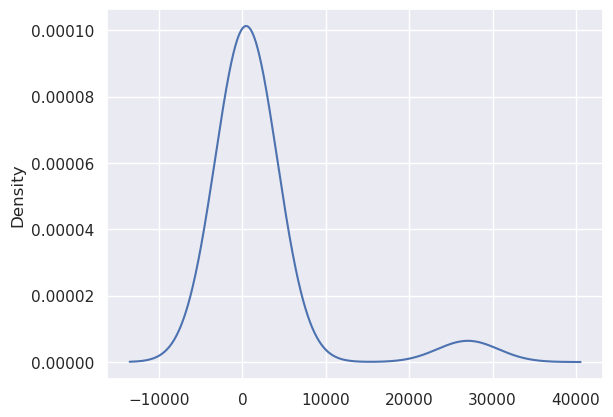

In [13]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [14]:
list(application_counts[application_counts < 500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [15]:
# Determine which values to replace if counts are less than a 500?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df['APPLICATION_TYPE'] = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [17]:
application_df.nunique()

NAME                19568
APPLICATION_TYPE        9
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

<AxesSubplot:ylabel='Density'>

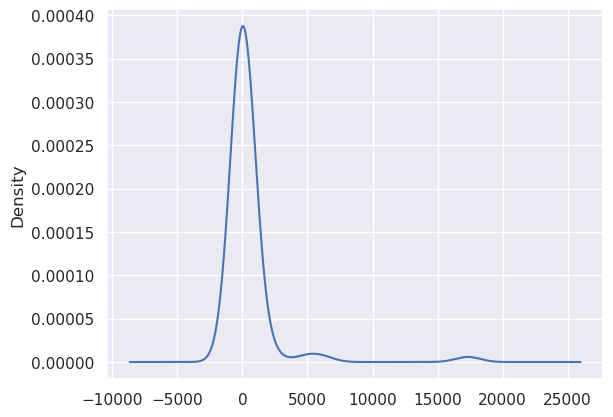

In [18]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [19]:
list(class_counts[class_counts < 1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [20]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [21]:
application_df.nunique()

NAME                19568
APPLICATION_TYPE        9
AFFILIATION             6
CLASSIFICATION          6
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [22]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


### Bin Names

In [23]:
# Look at NAME value_counts
name_counts = application_df['NAME'].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

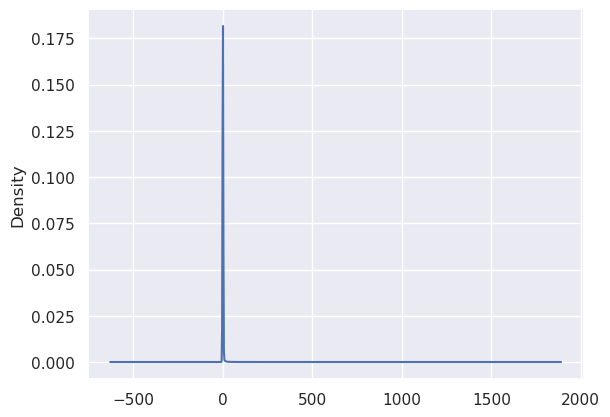

In [24]:
# visualize the value counts
name_counts.plot.density()

In [25]:
# how many name_counts are there less than 5?
name_counts[name_counts <= 5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [26]:
# Use binning technique to put those 5 or less in a bin call "Other"
# Determine which values to replace if counts are less than 5?
replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")
    
# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [27]:
# test
application_df.dtypes

NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [28]:
# test
[application_df.dtypes == 'object']

[NAME                 True
 APPLICATION_TYPE     True
 AFFILIATION          True
 CLASSIFICATION       True
 USE_CASE             True
 ORGANIZATION         True
 INCOME_AMT           True
 ASK_AMT             False
 IS_SUCCESSFUL       False
 dtype: bool]

In [29]:
# test
application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [30]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [31]:
# testing
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,Other,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0


### Add the encoded variable names to the DataFrame

In [32]:
# Testing
#application_df[application_cat]

### Create a OneHotEncoder instance

### Fit and transform the OneHotEncoder

### Add the encoded variable names to the DataFrames

In [33]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Merge one-hot encoded and drop the originals

In [34]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/home/leo/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
application_df.shape

(34299, 396)

In [36]:
# check if all numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Columns: 396 entries, ASK_AMT to INCOME_AMT_5M-10M
dtypes: float64(394), int64(2)
memory usage: 103.6 MB


### Split our preprocessed data into our features and target arrays

### Split the preprocessed data into a training and testing dataset

In [37]:
# Split our preprocessed data into our features and target arrays
#  X is our feature matrix
X_df = application_df.drop(['IS_SUCCESSFUL'], 1)

X = X_df.values

y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/home/leo/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Redifine the model, Compile, Train and Evaluate the Model

### Check the structure of the model

### Use TensorFlow playground to visualize the same model

In [39]:
# testing
len(X_train[0])

395

### Compile the model

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1
hidden_nodes_layer4 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Forth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1185)              469260    
                                                                 
 dense_1 (Dense)             (None, 790)               936940    
                                                                 
 dense_2 (Dense)             (None, 395)               312445    
                                                                 
 dense_3 (Dense)             (None, 20)                7920      
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,726,586
Trainable params: 1,726,586
Non-trainable params: 0
_________________________________________________________________


2022-10-25 03:58:39.202429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 03:58:39.202779: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Implement checkpoint

In [41]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

### Compile the model

In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Create a callback that saves the model's weights every epoch = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)


### Train the model

In [44]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
  4/804 [..............................] - ETA: 32s - loss: 0.7335 - accuracy: 0.4922
Epoch 1: saving model to checkpoints/weights.01.hdf5
  8/804 [..............................] - ETA: 51s - loss: 0.7002 - accuracy: 0.5391 
Epoch 1: saving model to checkpoints/weights.01.hdf5
 14/804 [..............................] - ETA: 56s - loss: 0.6900 - accuracy: 0.5335 
Epoch 1: saving model to checkpoints/weights.01.hdf5
 18/804 [..............................] - ETA: 1:05 - loss: 0.6949 - accuracy: 0.5295
Epoch 1: saving model to checkpoints/weights.01.hdf5
 24/804 [..............................] - ETA: 1:05 - loss: 0.6795 - accuracy: 0.5547
Epoch 1: saving model to checkpoints/weights.01.hdf5
 28/804 [>.............................] - ETA: 1:09 - loss: 0.6755 - accuracy: 0.5692
Epoch 1: saving model to checkpoints/weights.01.hdf5
 34/804 [>.............................] - ETA: 1:05 - loss: 0.6644 - accuracy: 0.5901
Epoch 1: saving model to checkpoints/weights.01.hdf5
 39/804 [>

### Evaluate the model

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 6s - loss: 0.4417 - accuracy: 0.7888 - 6s/epoch - 23ms/step
Loss: 0.44169583916664124, Accuracy: 0.7888046503067017


In [46]:
# Create a DataFrame containing training hystory
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))

<AxesSubplot:>

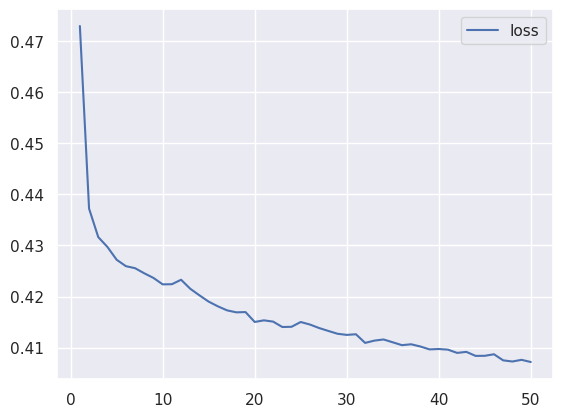

In [47]:
# plot the accuracy
history_df.plot(y='loss')

<AxesSubplot:>

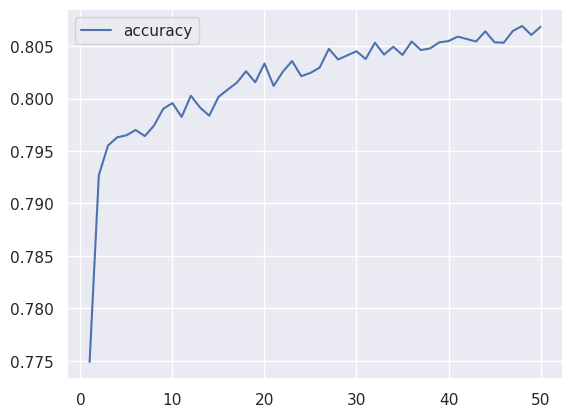

In [48]:
# plot the accuracy
history_df.plot(y='accuracy')

### Save model as HDF5 file

In [49]:
# Export our model to HDF5 file
nn.save("./Trained_Models/AlphabetSoupCharity_D3_3.h5")

### Predict the clasifier of new / unseen data
### Examine Random Forest Classifier for comparison to another easier to execute model

In [50]:
# import dependencies
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [51]:
# create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=1)

#fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

#
y_pred = rf_model.predict(X_test_scaled)
print(f'Random Forest predictive accuracy: {accuracy_score(y_test, y_pred):.3f}')

Random Forest predictive accuracy: 0.776


In [52]:
# display confusion metrix
cm = confusion_matrix(y_test, y_pred)

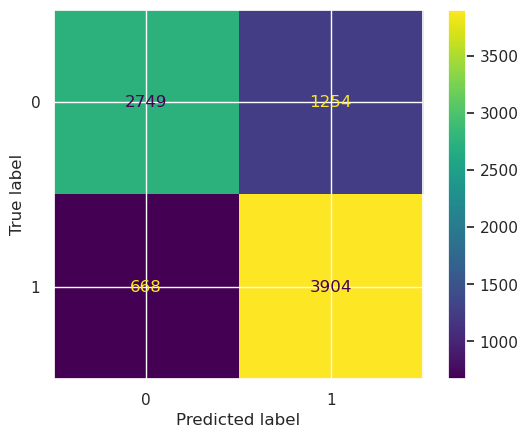

In [53]:
# display the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= rf_model.classes_)
disp.plot()
plt.savefig('./Images/RandomForestClasifier.png')
plt.show()

In [54]:
# Print the clasification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      4003
           1       0.76      0.85      0.80      4572

    accuracy                           0.78      8575
   macro avg       0.78      0.77      0.77      8575
weighted avg       0.78      0.78      0.77      8575



In [55]:
# get feature importance
# create feature importance from model
importances = rf_model.feature_importances_

In [56]:
# get columns names
columns = X_df.columns

In [57]:
# create dataFrame
feature_importances_df = pd.DataFrame({
    "feature": columns,
    "importance": importances
})

feature_importances_df.sort_values(by=["importance"], ascending=False, inplace=True)
feature_importances_df.reset_index(drop=True, inplace=True)
feature_importances_df

,feature,importance
0,ASK_AMT,0.274360
1,NAME_Other,0.072332
2,AFFILIATION_Independent,0.059615
3,AFFILIATION_CompanySponsored,0.055770
4,ORGANIZATION_Association,0.019687
...,...,...
390,NAME_DEPARTMENT OF UTAH LADIES AUXILIARY TO TH...,0.000018
391,NAME_VFW AUXILIARY DEPT OF HAWAII,0.000016
392,NAME_DAUGHTERS OF CHARITY HEALTH SYSTEM,0.000012
393,NAME_VETERANS OF FOREIGN WARS DEPARTMENT OF KA...,0.000009


/home/leo/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  del sys.path[0]


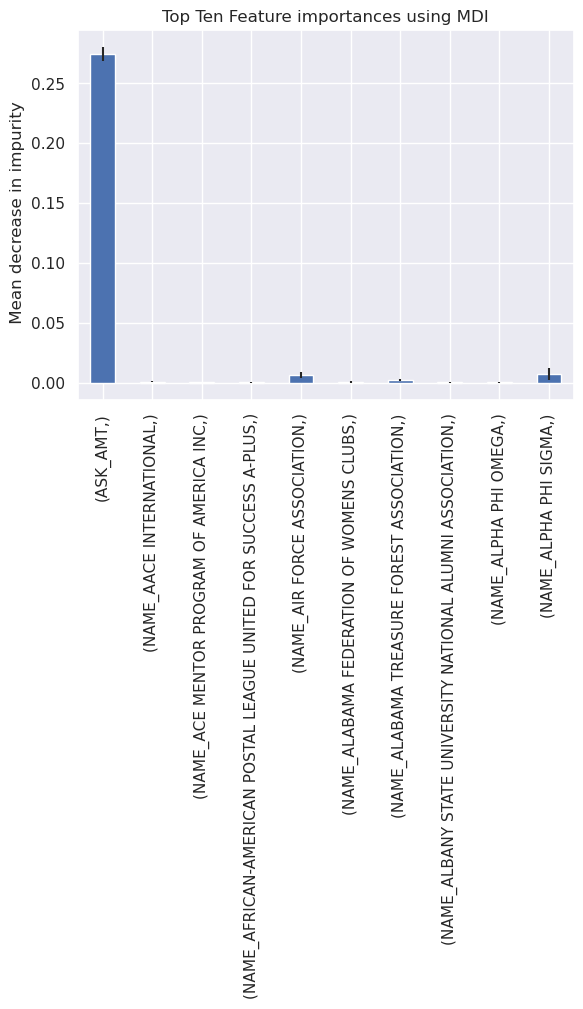

In [59]:
# Visualize the top 10 features

importances = rf_model.feature_importances_[:10]
std = np.std([
    tree.feature_importances_[:10] for tree in rf_model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=[X_df.columns[:10]])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Top Ten Feature importances using MDI')
ax.set_ylabel(' Mean decrease in impurity')
plt.savefig("./Images/ForestClasifier_feature_importances.png")
fig.tight_layout()